In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_log_error as rmsle

/kaggle/input/16-phones/k16_phones.xlsx
/kaggle/input/timeseries-klastering/df_k0_ts.csv
/kaggle/input/timeseries-klastering/df_k1_ts.csv
/kaggle/input/kmeans16/kmeans16.xlsx
/kaggle/input/money/df_ts_money.csv
/kaggle/input/grouped/grouped_df.xlsx


In [2]:
df_k16_p=pd.read_excel('/kaggle/input/16-phones/k16_phones.xlsx')

In [ ]:
df_k16_p.info()

In [ ]:
df_k16_p = df_k16_p.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [ ]:
filtered_df = df_k16_p
df_p_9 = filtered_df[['Телефон_new']]

In [21]:
df_p_9.to_csv('df_p_9.csv', index=False)

---

In [2]:
df_0=pd.read_csv('/kaggle/input/timeseries-klastering/df_k0_ts.csv')

In [3]:
df_0

,Дата,Количество
0,2017-01-01,1
1,2017-01-02,126
2,2017-01-03,60
3,2017-01-04,100
4,2017-01-05,92
...,...,...
356,2018-02-24,450
357,2018-02-25,793
358,2018-02-26,831
359,2018-02-27,545


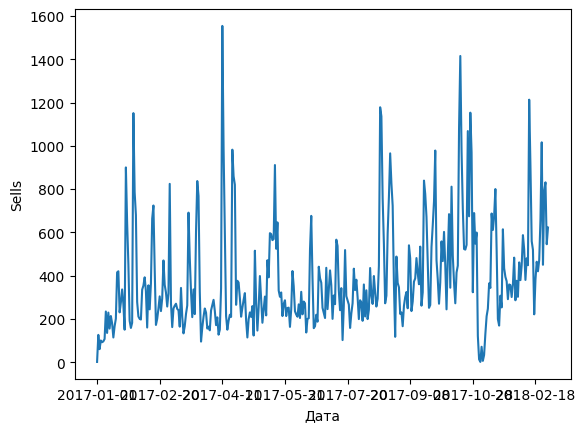

In [5]:
import matplotlib.pyplot as plt
df_0.plot(x="Дата", y="Количество", legend=None)
plt.ylabel("Sells")
plt.show()

In [5]:
df_0['Дата'] = pd.to_datetime(df_0['Дата'])

In [ ]:
from statsmodels.tsa.stattools import adfuller
df0 = df_0.set_index('Дата')
adf_result = adfuller(df0['Количество'], autolag='AIC')

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))
# Если статистика ADF меньше критических значений и p-value низкий, гипотеза о наличии единичного корня отвергается (ряд стационарен)

In [ ]:
from statsmodels.tsa.stattools import kpss

In [31]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(df_diff_0['Количество'], regression='c')

print('KPSS Statistic for 0: %f' % kpss_test[0])
print('p-value: %f' % kpss_test[1])
print('Critical Values:')
for key, value in kpss_test[3].items():
    print('\t%s: %.3f' % (key, value))

# Если статистика KPSS превышает критические значения и p-value низкий, нулевая гипотеза о стационарности отвергается (ряд может быть нестационарен)

KPSS Statistic for 0: 0.061789
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/tmp/ipykernel_34/3889446989.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(df_diff_0['Количество'], regression='c')


In [6]:
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.tsatools import lagmat

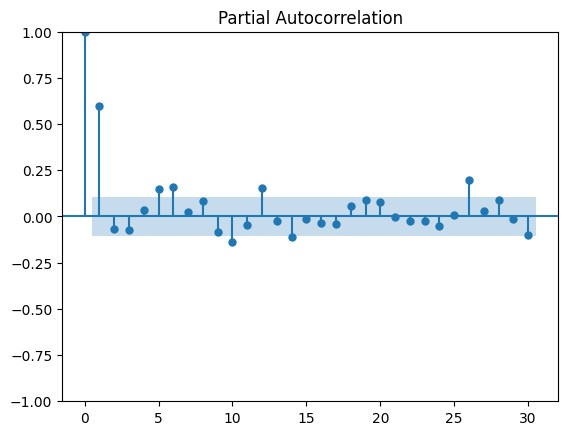

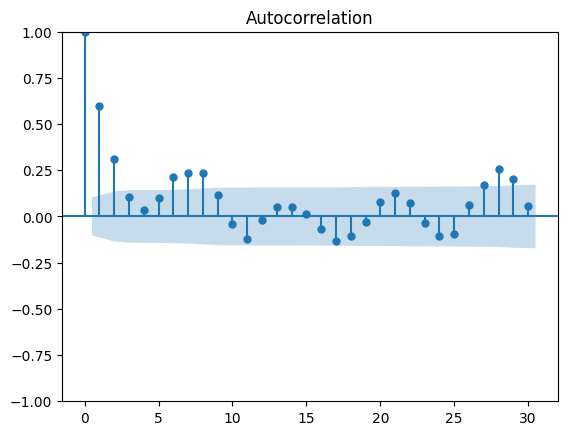

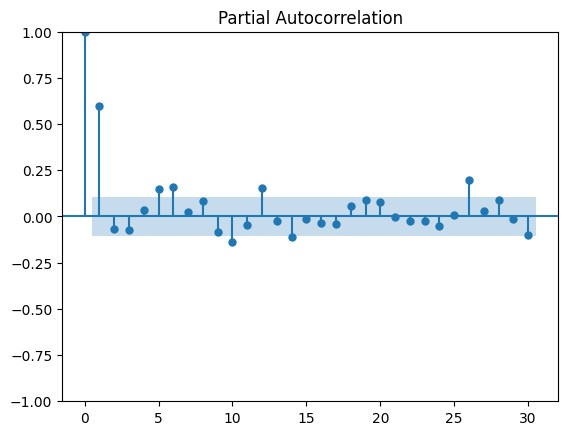

In [7]:
y = df_0[['Количество']].to_numpy()

plot_acf(y, lags=30)
plot_pacf(y, method="ols",lags=30)

In [15]:
import statsmodels.api as sm
resDiff = sm.tsa.arma_order_select_ic(y, max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Like

ARMA(p,q) = (3, 2) is the best.


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [8]:
Y = df_0[['Количество']]
Y = Y[:-90]

In [9]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Дата        361 non-null    datetime64[ns]
 1   Количество  361 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [10]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)

In [ ]:
def rmsle_m(actual, pred):
    actual_log = np.log(np.array(actual) + 1)
    pred_log = np.log(np.array(pred) + 1)
    return np.sqrt(np.mean(np.square(actual_log - pred_log)))

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [12]:
y3 = y.copy()
y3 = y3[:-91]
model2 = SARIMAX(y3, order=(3, 1, 2),seasonal_order=(1, 1, 1, 30))
model_fit = model2.fit(disp=False)
yhat1 = model_fit.predict(start=271, end = 361)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [13]:
y4 = np.append(y3, yhat1)

In [17]:
import matplotlib.pyplot as plt

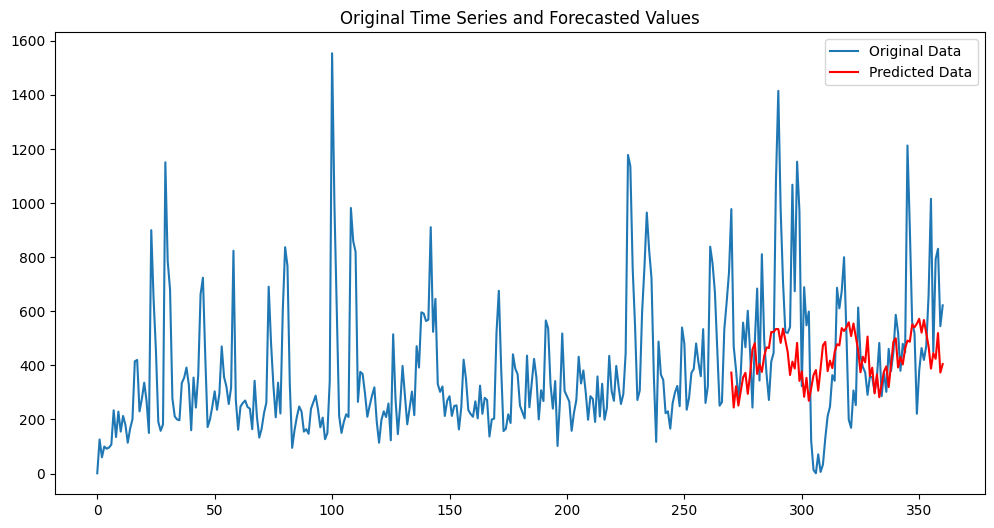

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(y, label='Original Data')

plt.plot(range(len(y3), len(y3) + len(yhat1)), yhat1, color='red', label='Predicted Data')

plt.title('Original Time Series and Forecasted Values')
plt.legend()
plt.show()


In [22]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [23]:
tr=df_0[['Количество']]
y_true= tr[-90:]

In [29]:
mape(y[-90:],y4[-90:])

5.821572489488431

In [28]:
rmsle_m(y[-90:],yhat1[-90:])

1.0029139078148561

### Vanilla LSTM с учетом кластеризации

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

data = df_0['Количество'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

train_size = len(data_scaled) - 90
test_size = 90
train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]

def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)
test_index = range(len(train), len(data_scaled))

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


269/269 - 2s - 8ms/step - loss: 0.0236
Epoch 2/100
269/269 - 1s - 2ms/step - loss: 0.0157
Epoch 3/100
269/269 - 1s - 2ms/step - loss: 0.0146
Epoch 4/100
269/269 - 1s - 2ms/step - loss: 0.0141
Epoch 5/100
269/269 - 1s - 2ms/step - loss: 0.0141
Epoch 6/100
269/269 - 1s - 2ms/step - loss: 0.0140
Epoch 7/100
269/269 - 1s - 2ms/step - loss: 0.0141
Epoch 8/100
269/269 - 1s - 2ms/step - loss: 0.0141
Epoch 9/100
269/269 - 1s - 5ms/step - loss: 0.0139
Epoch 10/100
269/269 - 1s - 2ms/step - loss: 0.0138
Epoch 11/100
269/269 - 1s - 2ms/step - loss: 0.0138
Epoch 12/100
269/269 - 1s - 2ms/step - loss: 0.0139
Epoch 13/100
269/269 - 1s - 2ms/step - loss: 0.0141
Epoch 14/100
269/269 - 1s - 2ms/step - loss: 0.0139
Epoch 15/100
269/269 - 1s - 2ms/step - loss: 0.0140
Epoch 16/100
269/269 - 1s - 2ms/step - loss: 0.0140
Epoch 17/100
269/269 - 1s - 2ms/step - loss: 0.0140
Epoch 18/100
269/269 - 1s - 2ms/step - loss: 0.0141
Epoch 19/100
269/269 - 1s - 2ms/step - loss: 0.0141
Epoch 20/100
269/269 - 1s - 2ms/s

In [36]:
import matplotlib.pyplot as plt

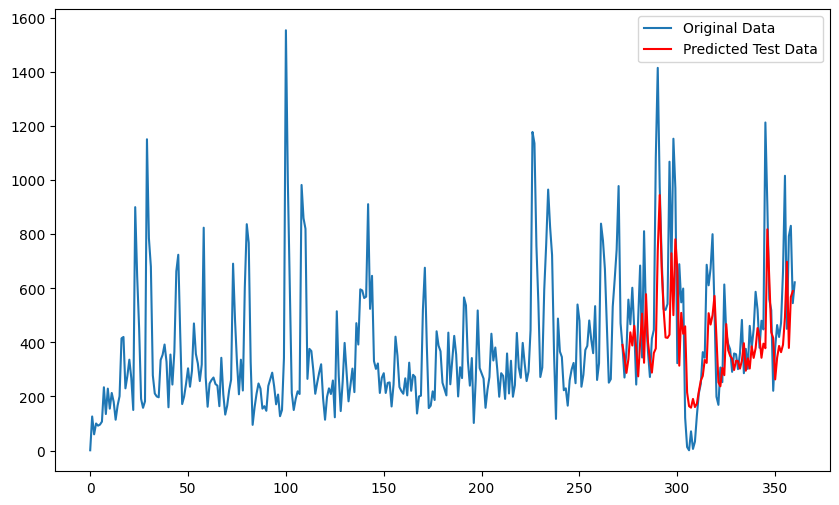

In [37]:
test_start_index = len(train) + look_back

plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data') 
plt.plot(range(test_start_index, test_start_index + len(test_predict)), test_predict, label='Predicted Test Data', color='red')  
plt.legend()
plt.show()

In [38]:
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

In [39]:
mape(y_true, test_predict)

2.7346274679911144

In [41]:
rmsle_m(y_true, test_predict)

0.8063047314752585

### Stacked LSTM с учетом клстеризации

In [415]:
data = df_0['Количество'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

train_size = len(data_scaled) - 90
test_size = 90
train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]

def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [416]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model_stacked = Sequential()
model_stacked.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], look_back)))
model_stacked.add(Dropout(0.2))
model_stacked.add(LSTM(50, activation='relu', return_sequences=True))
model_stacked.add(Dropout(0.2))
model_stacked.add(LSTM(50, activation='relu'))
model_stacked.add(Dense(1))

model_stacked.compile(optimizer='adam', loss='mean_squared_error')

print(X_train.shape)
print(y_train.shape)

model_stacked.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

train_predict = model_stacked.predict(X_train)
test_predict = model_stacked.predict(X_test)

(269, 1, 1)
(269,)
Epoch 1/100
269/269 - 6s - 22ms/step - loss: 0.0269
Epoch 2/100
269/269 - 1s - 4ms/step - loss: 0.0181
Epoch 3/100
269/269 - 1s - 4ms/step - loss: 0.0167
Epoch 4/100
269/269 - 1s - 5ms/step - loss: 0.0158
Epoch 5/100
269/269 - 1s - 4ms/step - loss: 0.0150
Epoch 6/100
269/269 - 1s - 5ms/step - loss: 0.0149
Epoch 7/100
269/269 - 1s - 5ms/step - loss: 0.0157
Epoch 8/100
269/269 - 1s - 4ms/step - loss: 0.0148
Epoch 9/100
269/269 - 1s - 4ms/step - loss: 0.0149
Epoch 10/100
269/269 - 1s - 5ms/step - loss: 0.0152
Epoch 11/100
269/269 - 1s - 4ms/step - loss: 0.0148
Epoch 12/100
269/269 - 1s - 4ms/step - loss: 0.0141
Epoch 13/100
269/269 - 1s - 5ms/step - loss: 0.0155
Epoch 14/100
269/269 - 1s - 4ms/step - loss: 0.0146
Epoch 15/100
269/269 - 1s - 5ms/step - loss: 0.0142
Epoch 16/100
269/269 - 1s - 4ms/step - loss: 0.0146
Epoch 17/100
269/269 - 1s - 5ms/step - loss: 0.0147
Epoch 18/100
269/269 - 1s - 4ms/step - loss: 0.0149
Epoch 19/100
269/269 - 1s - 4ms/step - loss: 0.0151
E

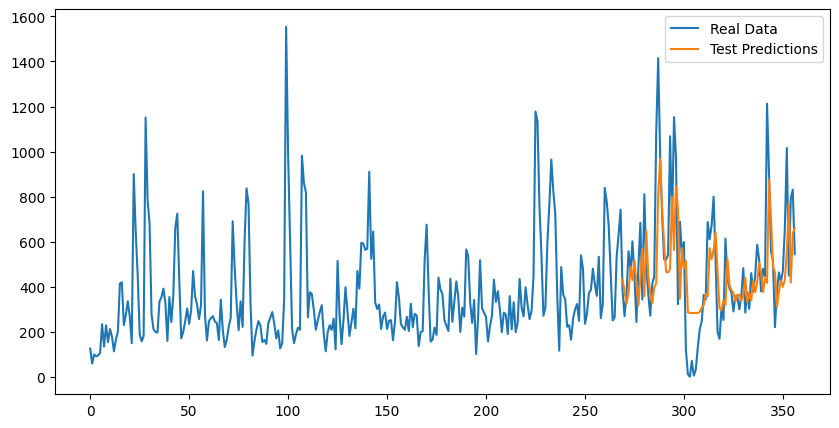

In [421]:
y_all = np.concatenate([y_train_inversed, y_test_inversed])

plt.figure(figsize=(10, 5))
plt.plot(y_all, label='Real Data')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), test_predict, label='Test Predictions')
plt.legend()
plt.show()

In [422]:
mape(y_test_inversed,test_predict)

4.4260283334142825

In [424]:
rmsle_m(y_test_inversed,test_predict)

0.885485051522361

# Предсказание стоимости

In [42]:
dfm=pd.read_csv('/kaggle/input/money/df_ts_money.csv')

In [45]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Дата     374 non-null    object 
 1   Выручка  374 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.0+ KB


In [46]:
dfm['Дата'] = pd.to_datetime(dfm['Дата'])

In [16]:
df_m = dfm.set_index('Дата')
adf_result = adfuller(dfm['Выручка'], autolag='AIC')

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.278736
p-value: 0.000006
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


In [50]:
df_diff = dfm.diff().dropna()
kpss_test_diff = kpss(df_diff['Выручка'], regression='c')
print('\nKPSS после дифференцирования:')
print('KPSS Statistic: %f' % kpss_test_diff[0])
print('p-value: %f' % kpss_test_diff[1])
print('Critical Values:')
for key, value in kpss_test_diff[3].items():
    print('\t%s: %.3f' % (key, value))


KPSS после дифференцирования:
KPSS Statistic: 0.108070
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/tmp/ipykernel_33/3091432991.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test_diff = kpss(df_diff['Выручка'], regression='c')


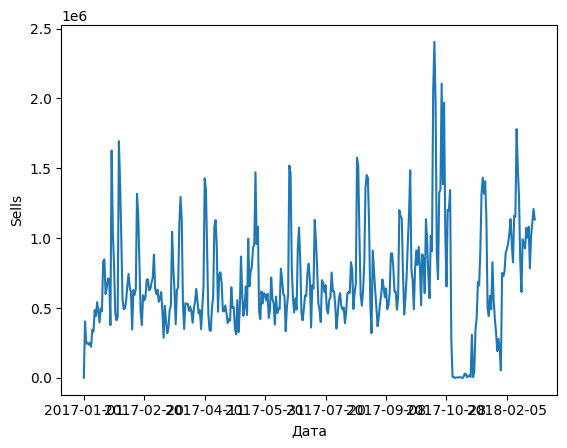

In [4]:
dfm.plot(x="Дата", y="Выручка", legend=None)
plt.ylabel("Sells")
plt.show()

### Prophet для стоимости

In [51]:
!pip install yfinance

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 36.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 2.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-cp310-cp310-linux_x86_64.whl size=293378 sha256=7538da949de13fd5c4a4abab2ab4d5490eb2d622ea120d09dc417b6c60749eef
  Stored in directory: /root/.cache/pip/wheels/06/80/9b/98db0d58349a2f5c09f8406789ade4270762f97b7d26f2fa22
Successfully built peewee


In [52]:
import yfinance as yf
from datetime import datetime
from datetime import timedelta
import plotly.graph_objects as go
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import warnings

warnings.filterwarnings('ignore')

pd.options.display.float_format = '${:,.2f}'.format

In [4]:
dfm['Дата'] = pd.to_datetime(dfm['Дата'])

In [53]:
df = dfm[['Дата', 'Выручка']]

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      374 non-null    datetime64[ns]
 1   y       374 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.0 KB


In [55]:
df.columns = ['ds', 'y']

In [56]:
x = df["ds"]
y = df["y"]

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y))

# Set title
fig.update_layout(
    title_text="Time series plot of sells",
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list(
                [
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all"),
                ]
            )
        ),
        rangeslider=dict(visible=True),
        type="date",
    )
)

In [67]:
train_df = df[:-90] 

In [407]:
m = Prophet()
m.add_seasonality(name='50_days', period=54, fourier_order=12)  
m.add_seasonality(name='mounth', period=33, fourier_order=10) 
m.add_seasonality(name='days', period=4, fourier_order=1)
m.add_seasonality(name='semi_year', period=155, fourier_order=10)

m.fit(train_df)

00:50:47 - cmdstanpy - INFO - Chain [1] start processing
00:50:47 - cmdstanpy - INFO - Chain [1] done processing


In [408]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)

In [409]:
plot_plotly(m, forecast)

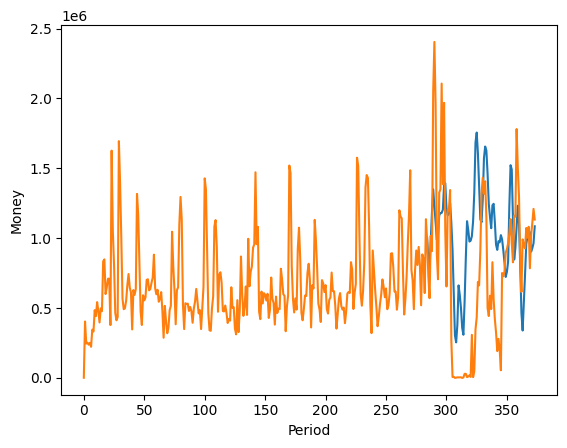

In [414]:
plt.ylabel("Money")
plt.xlabel("Period")
y1 = df['y']
#plt.plot(y1)
y2 = forecast['yhat_upper'][-90:]
plt.plot(y2)
plt.plot(y)

In [411]:
mape(y[-90:],y2[-90:])

49.11563650867432

In [413]:
rmsle_m(y[-90:],y2[-90:])

2.265935936619763

### Vanilla LSTM для стоимости

In [5]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Дата     374 non-null    datetime64[ns]
 1   Выручка  374 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.0 KB


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

data = dfm['Выручка'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

train_size = len(data_scaled) - 90
test_size = 90
train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]

def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)
test_predict = model.predict(X_test)

test_predict = scaler.inverse_transform(test_predict)
test_index = range(len(train), len(data_scaled))

2024-05-16 11:39:12.338317: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 11:39:12.338465: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 11:39:12.512628: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


282/282 - 2s - 7ms/step - loss: 0.0228
Epoch 2/100
282/282 - 0s - 2ms/step - loss: 0.0107
Epoch 3/100
282/282 - 1s - 2ms/step - loss: 0.0100
Epoch 4/100
282/282 - 1s - 2ms/step - loss: 0.0096
Epoch 5/100
282/282 - 1s - 2ms/step - loss: 0.0092
Epoch 6/100
282/282 - 0s - 2ms/step - loss: 0.0094
Epoch 7/100
282/282 - 0s - 2ms/step - loss: 0.0093
Epoch 8/100
282/282 - 1s - 2ms/step - loss: 0.0092
Epoch 9/100
282/282 - 1s - 2ms/step - loss: 0.0092
Epoch 10/100
282/282 - 0s - 2ms/step - loss: 0.0093
Epoch 11/100
282/282 - 1s - 2ms/step - loss: 0.0093
Epoch 12/100
282/282 - 1s - 2ms/step - loss: 0.0094
Epoch 13/100
282/282 - 0s - 2ms/step - loss: 0.0092
Epoch 14/100
282/282 - 1s - 2ms/step - loss: 0.0093
Epoch 15/100
282/282 - 0s - 2ms/step - loss: 0.0091
Epoch 16/100
282/282 - 1s - 2ms/step - loss: 0.0093
Epoch 17/100
282/282 - 1s - 2ms/step - loss: 0.0090
Epoch 18/100
282/282 - 1s - 2ms/step - loss: 0.0093
Epoch 19/100
282/282 - 1s - 2ms/step - loss: 0.0091
Epoch 20/100
282/282 - 1s - 2ms/s

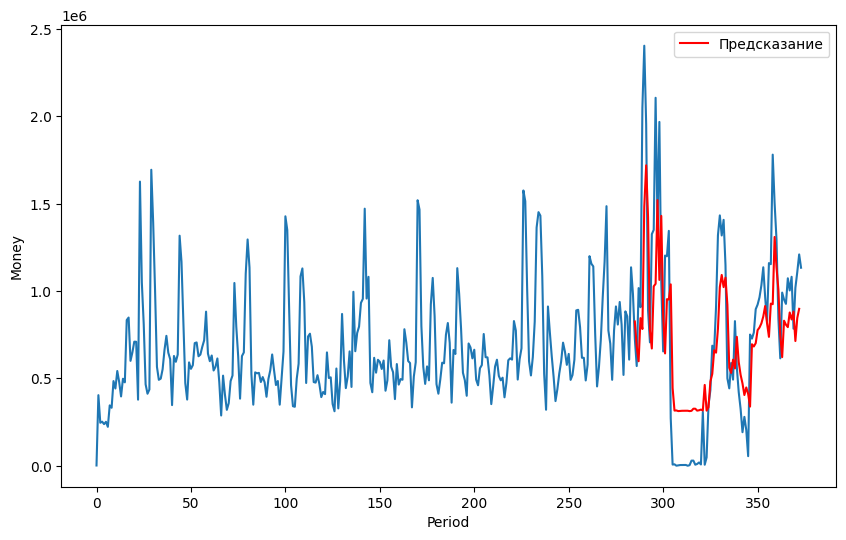

In [14]:
test_start_index = len(train) + look_back

plt.figure(figsize=(10, 6))
plt.ylabel("Money")
plt.xlabel("Period")
plt.plot(data) 
plt.plot(range(test_start_index, test_start_index + len(test_predict)), test_predict, label='Предсказание', color='red')
plt.legend()
plt.show()

In [9]:
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

In [11]:
mape( y_true, test_predict)

38.99596788829223

In [12]:
rmsle_m( y_true, test_predict)

1.992637110407381